In [29]:
!pip install tabgan be_great table_evaluator

In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tabgan.sampler import GANGenerator

In [31]:
df = pd.read_csv("data.csv")
df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.0,0.333333,0.0,0.0,0.713178,0.724662,191.0,0.0,0.0,0.000000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.0,0.333333,0.0,0.0,0.666667,0.731014,190.0,0.0,0.0,0.002770
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.0,0.166667,0.0,0.0,0.627907,0.621375,189.0,0.0,0.0,0.005540
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.0,0.333333,0.0,0.0,0.573643,0.662386,188.0,0.0,0.0,0.008310
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.0,0.416667,0.0,0.0,0.589147,0.704502,187.0,0.0,0.0,0.011080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,29,135,0.568966,0.833333,0.0,0.0,0.722892,0.494005,0.590648,0.0,...,0.0,0.500000,0.0,0.0,0.457364,0.362193,28.0,1.0,1.0,0.371191
5765,29,136,0.436782,0.083333,0.0,0.0,0.566265,0.488337,0.563133,0.0,...,0.0,0.416667,0.0,0.0,0.333333,0.322425,27.0,1.0,1.0,0.373961
5766,29,137,0.442529,0.416667,0.0,0.0,0.509036,0.605189,0.562795,0.0,...,0.0,0.500000,0.0,0.0,0.348837,0.414250,26.0,1.0,1.0,0.376731
5767,29,138,0.367816,0.333333,0.0,0.0,0.644578,0.535862,0.704254,0.0,...,0.0,0.583333,0.0,0.0,0.294574,0.287490,25.0,1.0,1.0,0.379501


In [32]:
df.isna().sum()

id            0
cycle         0
setting1      0
setting2      0
setting3      0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
s7            0
s8            0
s9            1
s10           1
s11           1
s12           1
s13           1
s14           1
s15           1
s16           1
s17           1
s18           1
s19           1
s20           1
s21           1
RUL           1
label1        1
label2        1
cycle_norm    1
dtype: int64

In [33]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [34]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(
    df_imputed.drop("RUL", axis=1),
    df_imputed["RUL"],
    test_size=0.20,
    random_state=42
)

In [35]:
df_x_train = pd.DataFrame(df_x_train, columns=df_x_train.columns)
df_y_train = pd.DataFrame(df_y_train, columns=["RUL"])
df_x_test = pd.DataFrame(df_x_test, columns=df_x_test.columns)
df_y_test = pd.DataFrame(df_y_test, columns=["RUL"])

In [36]:
gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999,
           is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100,
               "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gen_params={"batch_size": 500, "patience": 25, "epochs": 500}
          ).generate_data_pipe(df_x_train, df_y_train, df_x_test, deep_copy=True, only_adversarial=False, use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/30 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 923, number of negative: 923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1528
[LightGBM] [Info] Number of data points in the train set: 1846, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [37]:
gen_x

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,label1,label2,cycle_norm
0,8.0,109.0,0.172414,0.583333,0.0,0.0,0.509036,0.559407,0.503883,0.0,...,0.641016,0.0,0.500000,0.0,0.0,0.550388,0.531483,0.0,0.0,0.299169
1,19.0,142.0,0.454023,0.500000,0.0,0.0,0.734940,0.464792,0.574443,0.0,...,0.559446,0.0,0.666667,0.0,0.0,0.333333,0.518503,1.0,1.0,0.390582
2,19.0,141.0,0.258621,0.250000,0.0,0.0,0.608434,0.618705,0.666273,0.0,...,0.535206,0.0,0.416667,0.0,0.0,0.387597,0.380144,1.0,1.0,0.387812
3,15.0,201.0,0.310345,0.666667,0.0,0.0,0.701807,0.705690,0.617995,0.0,...,0.647172,0.0,0.583333,0.0,0.0,0.325581,0.441176,1.0,2.0,0.554017
4,12.0,148.0,0.293103,0.750000,0.0,0.0,0.578313,0.677349,0.674375,0.0,...,0.596768,0.0,0.500000,0.0,0.0,0.550388,0.354046,1.0,1.0,0.407202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,17.0,262.0,0.431034,0.416667,0.0,0.0,0.623494,0.586440,0.604490,0.0,...,0.507118,0.0,0.750000,0.0,0.0,0.217054,0.263877,1.0,2.0,0.722992
4395,14.0,177.0,0.528736,0.083333,0.0,0.0,0.891566,0.613909,0.716070,0.0,...,0.737591,0.0,0.750000,0.0,0.0,0.248062,0.171914,1.0,2.0,0.487535
4396,2.0,276.0,0.396552,0.833333,0.0,0.0,0.786145,0.750382,0.800304,0.0,...,0.741824,0.0,0.666667,0.0,0.0,0.209302,0.269677,1.0,2.0,0.761773
4397,2.0,260.0,0.655172,0.583333,0.0,0.0,0.521084,0.489863,0.627279,0.0,...,0.583686,0.0,0.333333,0.0,0.0,0.232558,0.357360,1.0,1.0,0.717452


In [38]:
print(gen_y.head())

0    41.0
1    16.0
2    17.0
3     6.0
4    22.0
Name: RUL, dtype: float64


In [39]:
gen_x.shape

(4399, 29)

In [40]:
print(gen_x.isna().sum())
print(gen_y.isna().sum())

id            0
cycle         0
setting1      0
setting2      0
setting3      0
s1            0
s2            0
s3            0
s4            0
s5            0
s6            0
s7            0
s8            0
s9            0
s10           0
s11           0
s12           0
s13           0
s14           0
s15           0
s16           0
s17           0
s18           0
s19           0
s20           0
s21           0
label1        0
label2        0
cycle_norm    0
dtype: int64
0


In [41]:
output_file_path = "tabgan_x.csv"
gen_x.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to tabgan_x.csv


In [42]:
output_file_path = "tabgan_y.csv"
gen_y.to_csv(output_file_path, index=False)
print(f"Data saved to {output_file_path}")

Data saved to tabgan_y.csv


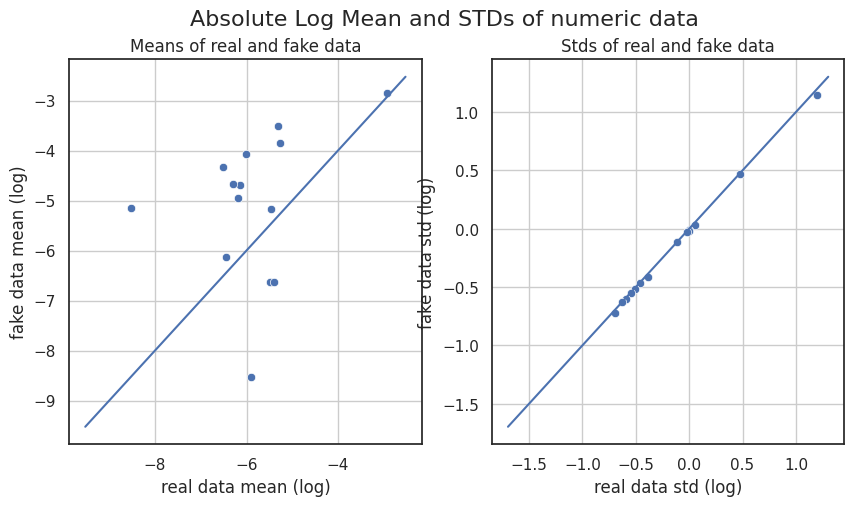

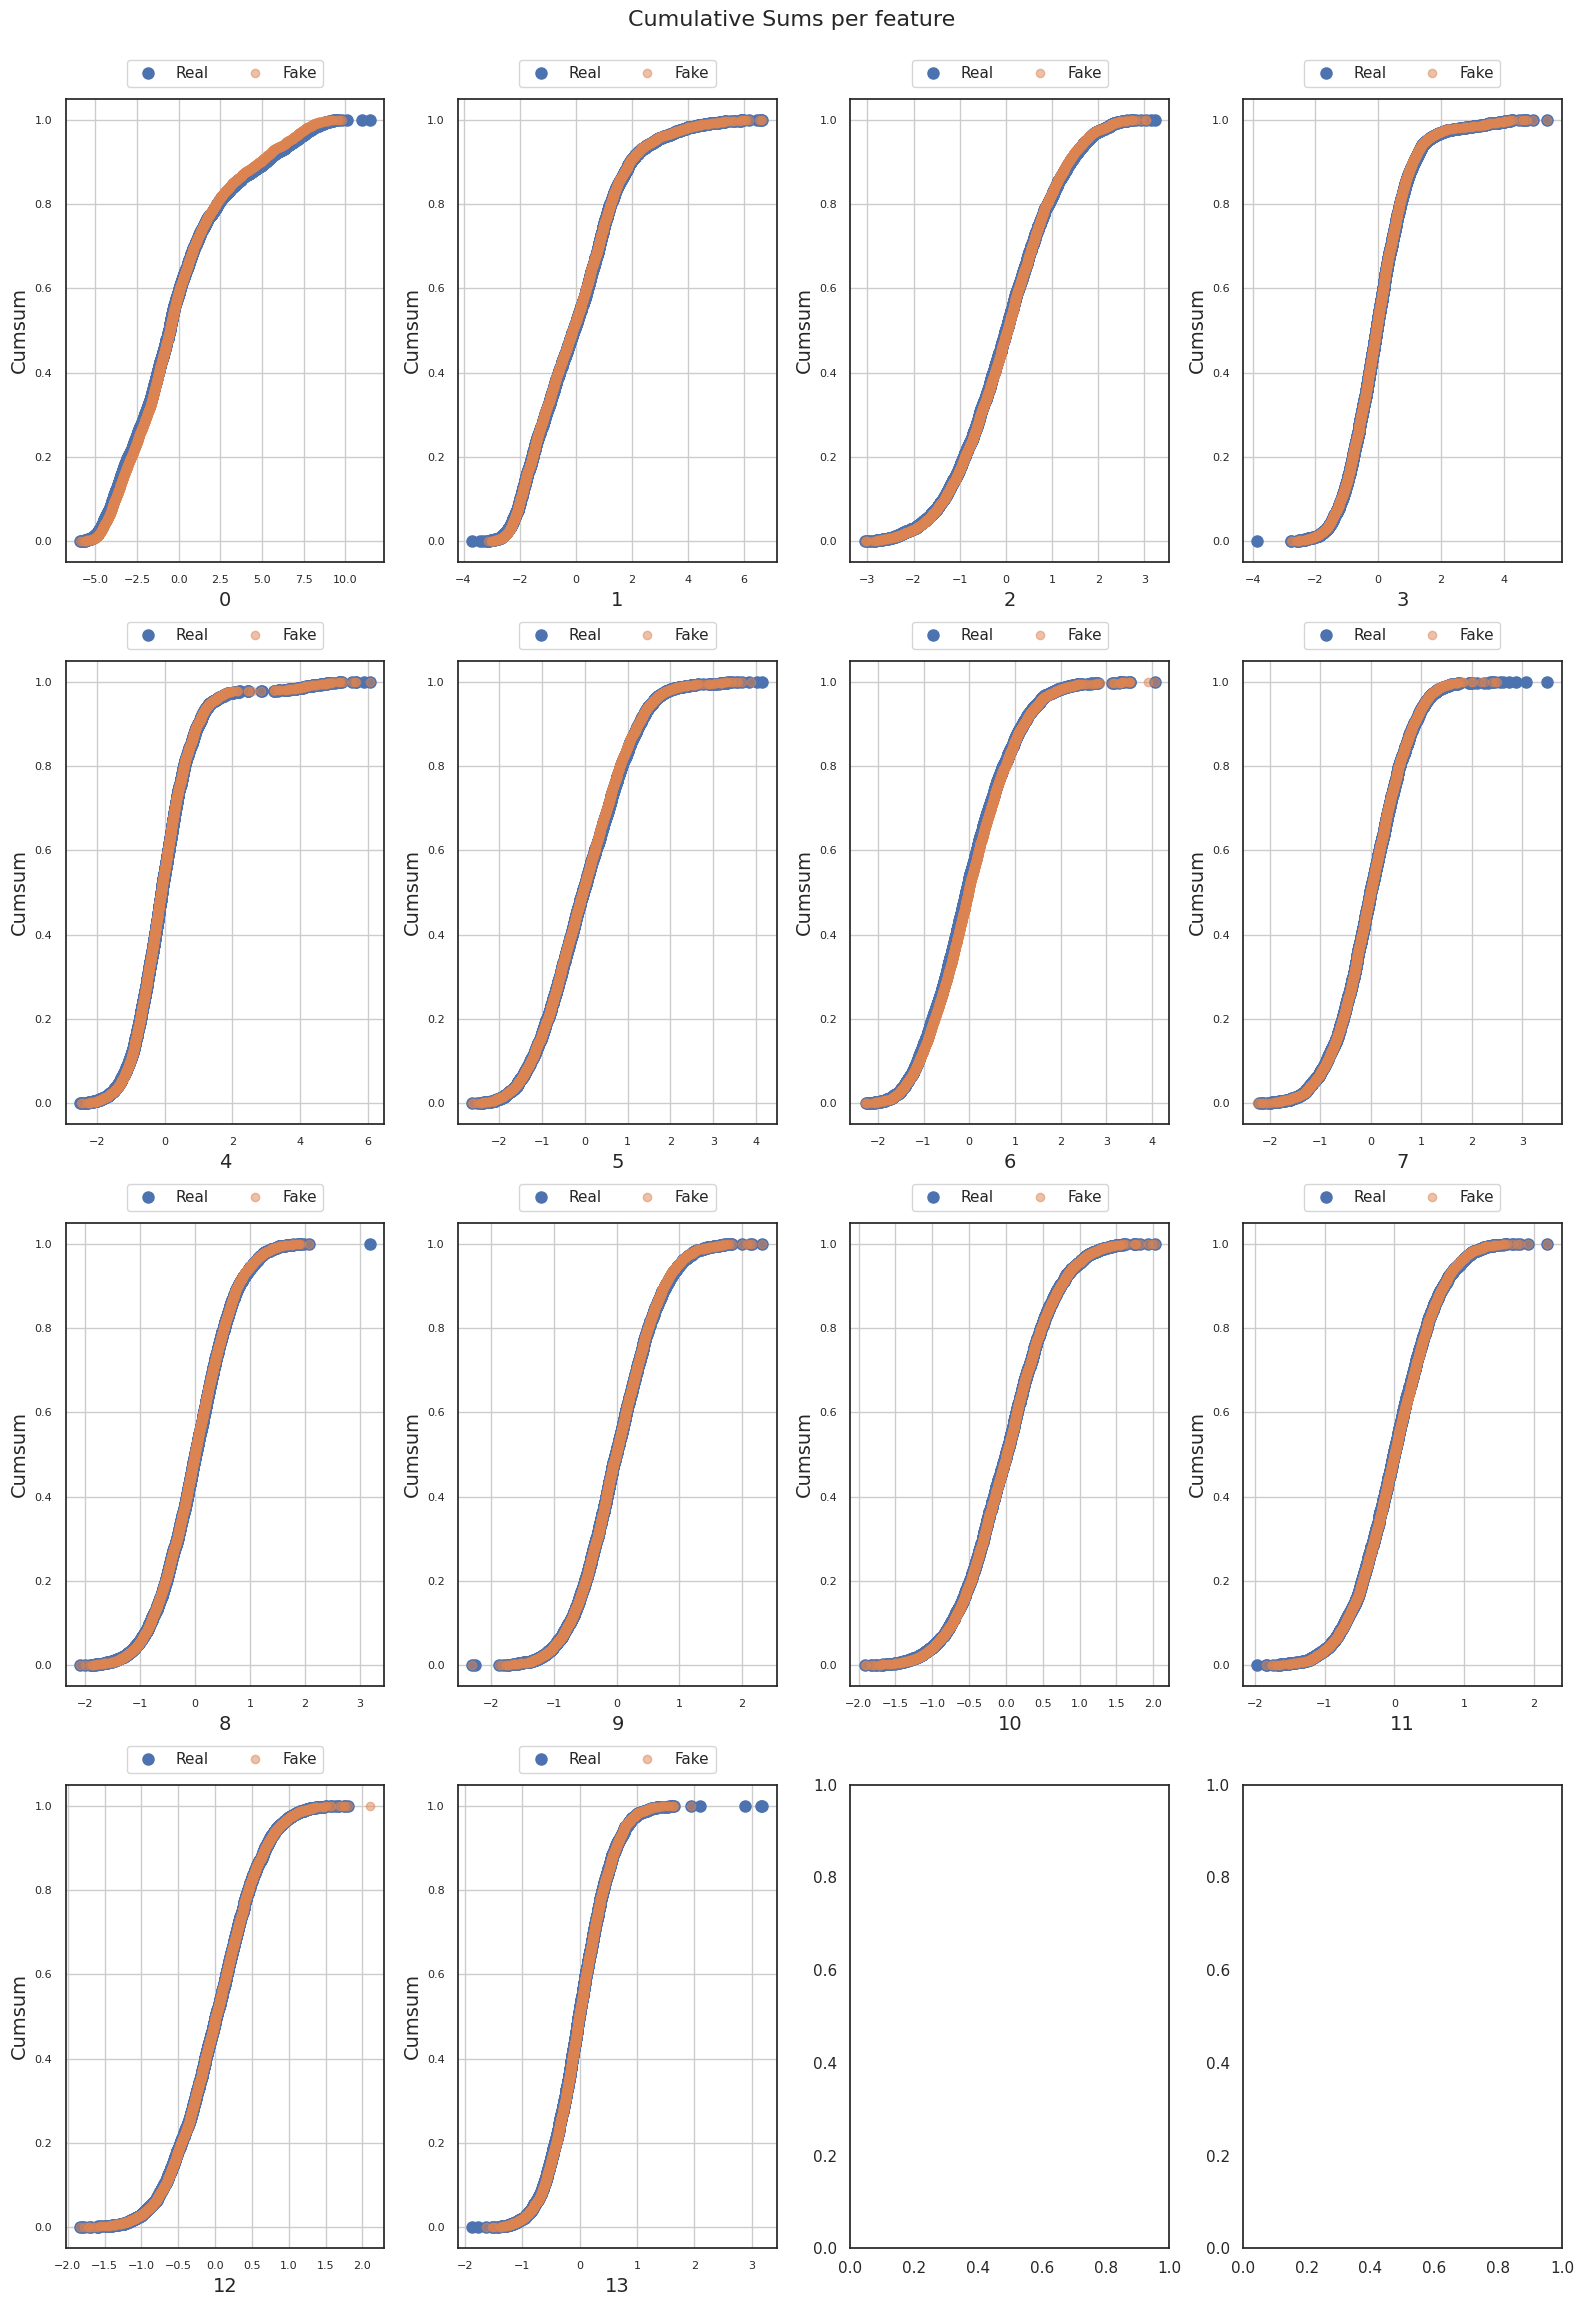

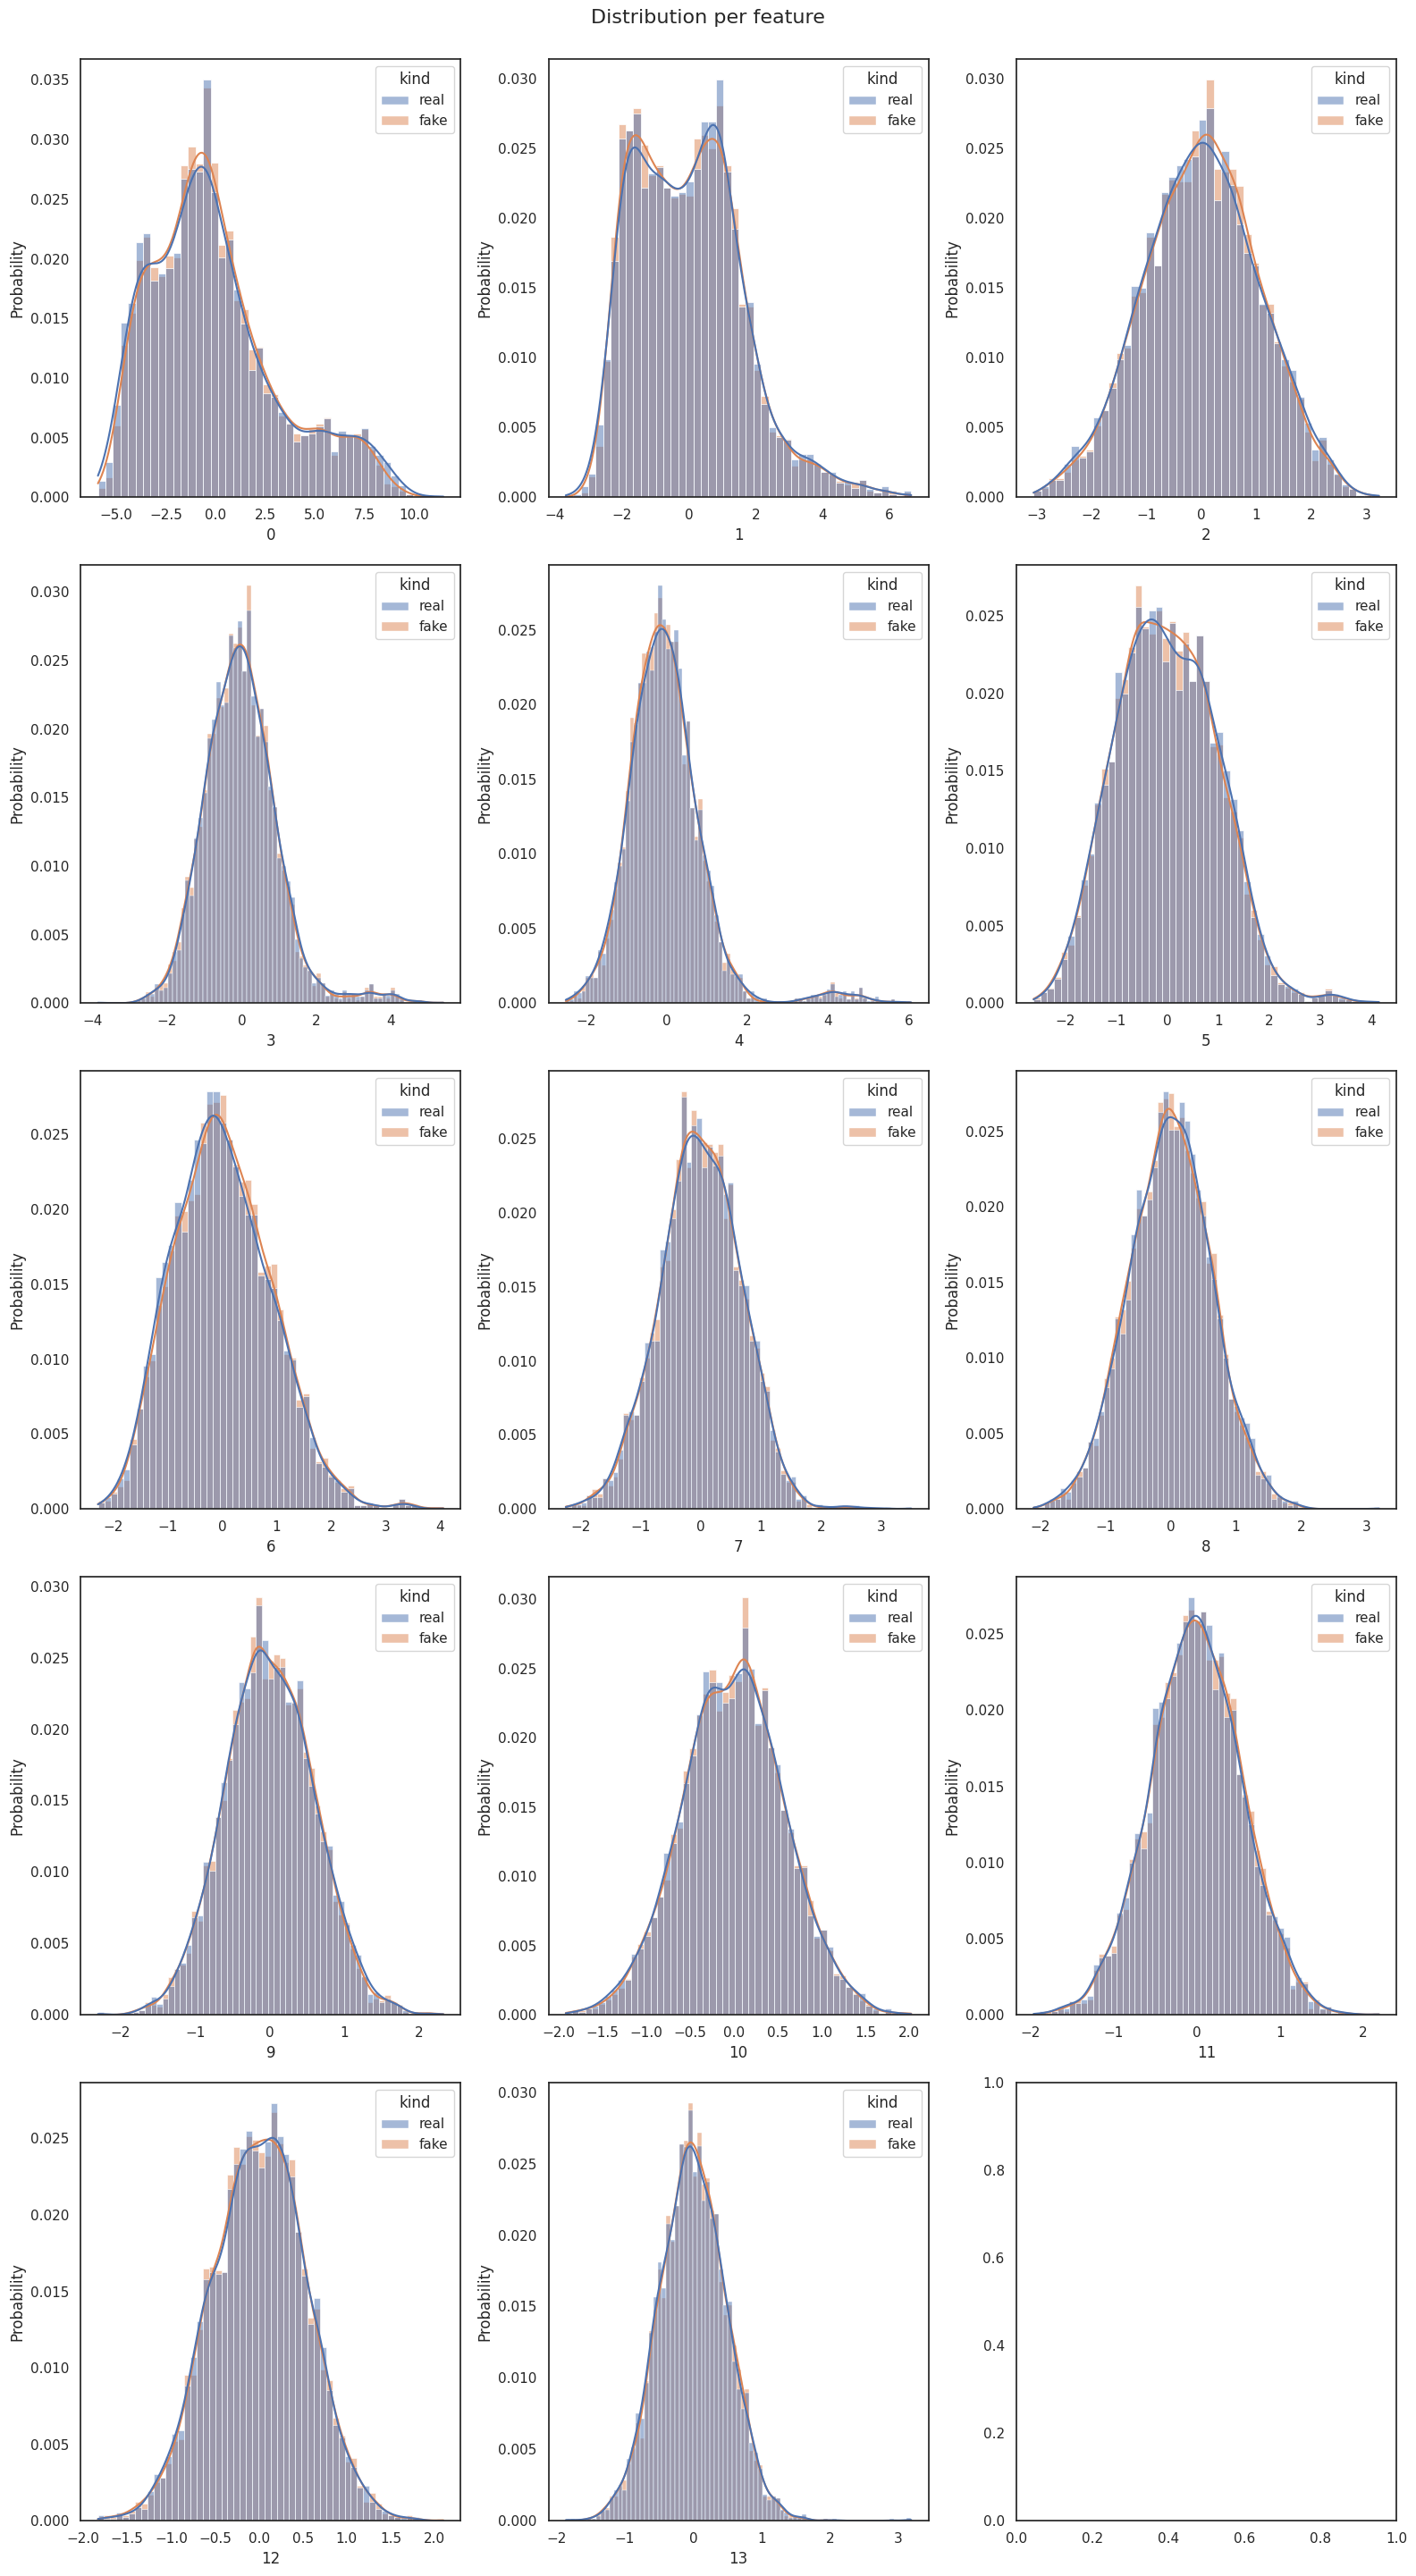

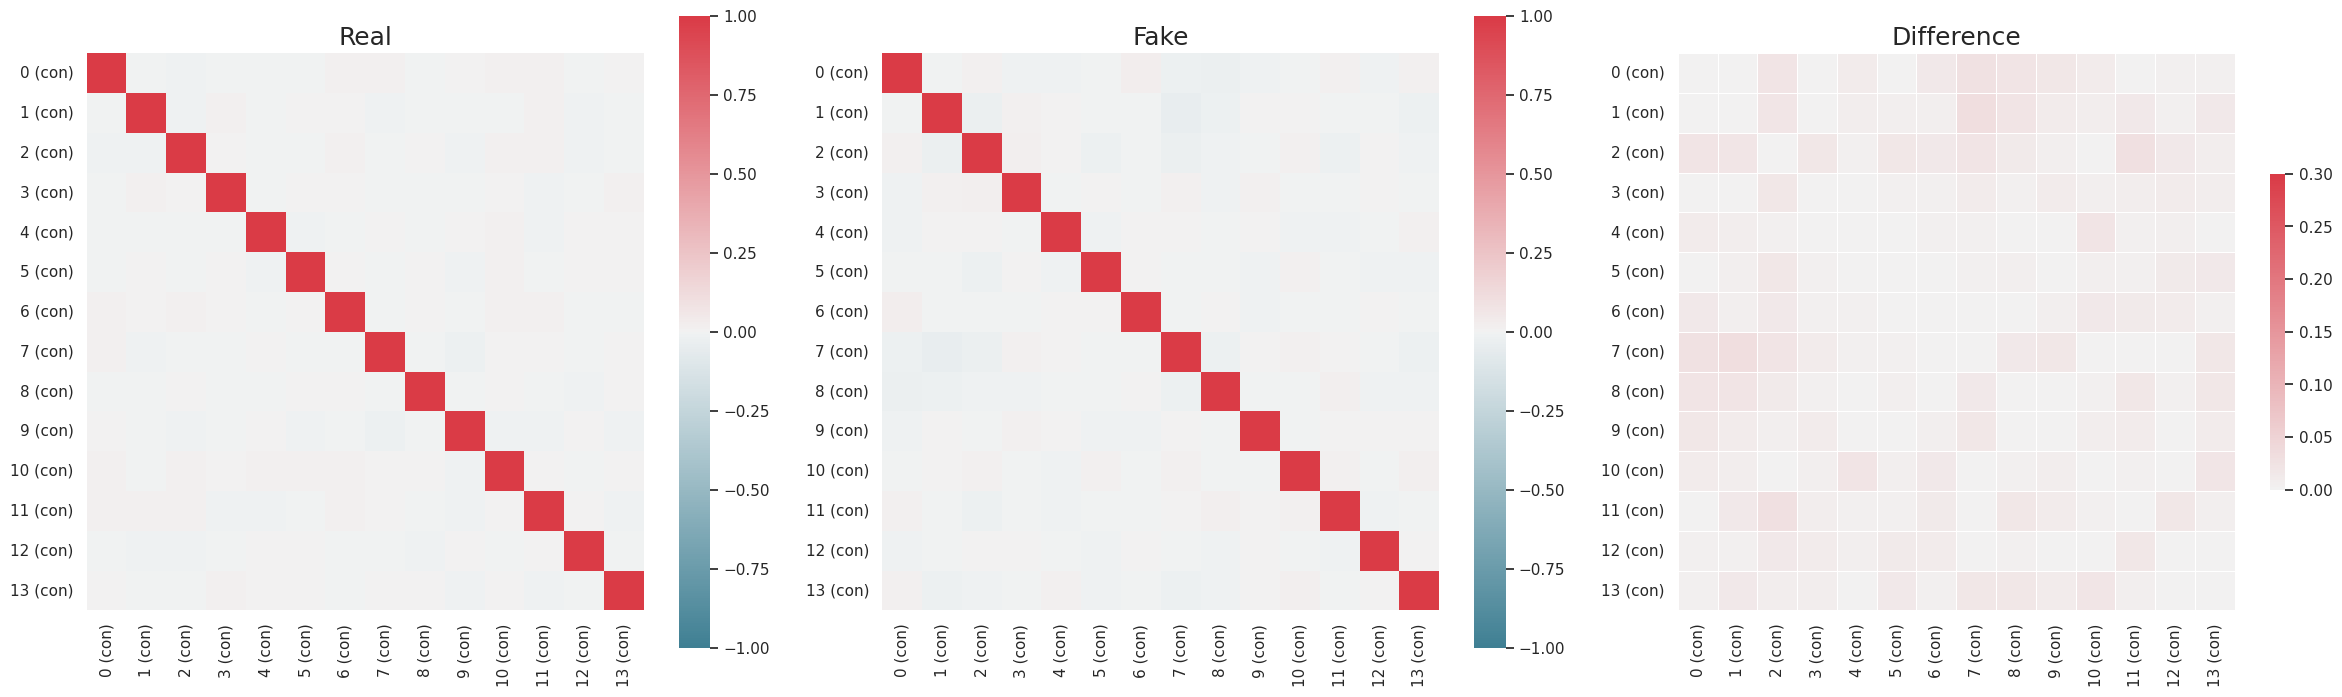

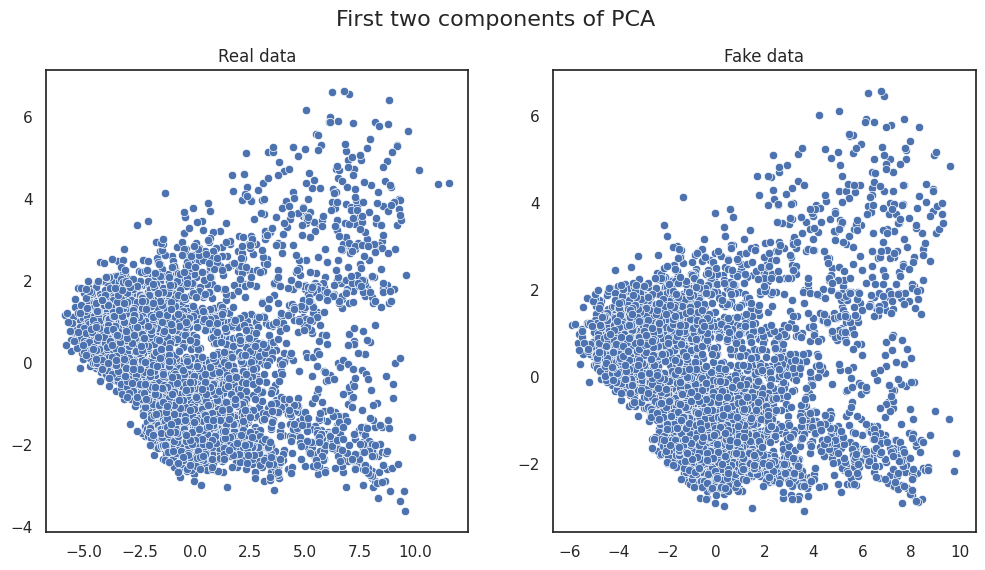

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from table_evaluator import TableEvaluator
import pandas as pd

# Normalize and scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed.drop("RUL", axis=1))
gen_x_scaled = scaler.transform(gen_x)

# Perform PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
gen_x_pca = pca.transform(gen_x_scaled)

# Evaluate using TableEvaluator
table_evaluator = TableEvaluator(pd.DataFrame(df_pca), pd.DataFrame(gen_x_pca))
table_evaluator.visual_evaluation()